## **CIND820 - Capstone Project**



# **Investigate Airline passenger satisfaction using Machine Learning Techniques**


# **Supervised Machine Learning**

# **Preparation:**

In [ ]:
! python -V

Python 3.10.6


In [ ]:
pip install pandas-profiling

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0414dd75d29e240c9ef2c76161341379ffc1838e94ede99ccf3c60ac965e15fe
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
# !pip install --upgrade scikit-learn

In [ ]:
pip install tabulate

In [212]:
# Importing required libraries

import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import LabelEncoder
from operator import itemgetter
from sklearn import preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
import sklearn.feature_selection as fs

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from tabulate import tabulate
# from xgboost import XGBClassifier

import sklearn
import time
from resource import getrusage, RUSAGE_SELF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

**Import csv file (the dataset and the data dictionary)**



In [213]:
# Import the dataset
# Use first column "ID" as Index by using index_col=0

url = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/airline_passenger_satisfaction.csv'
df1 = pd.read_csv(url, index_col=0)
df1.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [214]:
# check the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

**From "Departure and Arrival Time Convenience" to Baggage Handling" are caategorical valuable. The values are satisfaction level from 1 (lowest) to 5 (highest) - 0 means "not applicable". Therefore, we convert the data type of them from int64 to category.**

In [215]:
num_cols = ["Age","Flight Distance","Departure Delay","Arrival Delay"]
cat_cols = list(set(df1.columns) - set(num_cols))
## cat_columns = ["Gender","Customer Type","Type of Travel","Class","Departure and Arrival Time Convenience","Ease of Online Booking","Check-in Service","Online Boarding","Gate Location","On-board Service","Seat Comfort","Leg Room Service","Cleanliness","Food and Drink", "In-flight Service","In-flight Wifi Service","In-flight Entertainment","Baggage Handling","Satisfaction"]
display(len(cat_cols), len(cat_cols))

19

19

In [216]:
# check the data after change the data type
for clmn in cat_cols:
  df1[clmn] = df1[clmn].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  category
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  category
 3   Type of Travel                          129880 non-null  category
 4   Class                                   129880 non-null  category
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival Delay                           129487 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

In [217]:
# Import the dictionary

url2 = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/data_dictionary.csv'
data_dictionary = pd.read_csv(url2, index_col=0)
data_dictionary

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


# **Exploratory Data Analysis (EDA)**

**Install pandas-profiling**

In [ ]:
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [218]:
# check the first 10 rows
df1.head(10)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,...,4,4,4,3,3,4,4,4,4,Satisfied
7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,Satisfied
8,Female,60,Returning,Business,Business,853,0,3.0,3,4,...,3,4,4,4,4,3,4,3,3,Satisfied
9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  category
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  category
 3   Type of Travel                          129880 non-null  category
 4   Class                                   129880 non-null  category
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival Delay                           129487 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

**Observations:**
*   Number of variable: 23
*   Number of entries: 129880




**Check missing data**

In [220]:
missing_values = pd.isnull(df1)
missing_values.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [221]:
df1.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

**Check description of the data**

In [222]:
df1.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


# **Supervised Machine Learning**

## **Data preparation for Supervised Machine Learning**

**Remove missing values**

In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender                                  129880 non-null  category
 1   Age                                     129880 non-null  int64   
 2   Customer Type                           129880 non-null  category
 3   Type of Travel                          129880 non-null  category
 4   Class                                   129880 non-null  category
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival Delay                           129487 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

In [224]:
df1['Arrival Delay'].isnull().sum()

393

In [225]:
# Checking % of missing values
percent_missing = df1['Arrival Delay'].isnull().sum() * 100 / len(df1['Arrival Delay'])
percent_missing

0.3025870033877425

In [226]:
# Missing value ratio is only 0.3%. Therefore, I will remove missing values before splitting dataset
df2 = df1.copy()
df2 = df2.dropna(how='any',axis=0)
df2.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [227]:
# check the # of entries after removing missing values
row_count = len(df2.index)
row_count

129487

In [228]:
# Create on-hot-key for the categorical variables using the function pd.get_dummies()
y = df2['Satisfaction']
df3 = df2.drop(['Satisfaction'], axis=1)
if 'Satisfaction' in cat_cols:
  cat_cols.remove('Satisfaction')
df3 = pd.get_dummies(df3, columns=cat_cols, prefix = cat_cols)
X = df3.copy()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 1 to 129880
Data columns (total 96 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age                                       129487 non-null  int64  
 1   Flight Distance                           129487 non-null  int64  
 2   Departure Delay                           129487 non-null  int64  
 3   Arrival Delay                             129487 non-null  float64
 4   In-flight Service_0                       129487 non-null  uint8  
 5   In-flight Service_1                       129487 non-null  uint8  
 6   In-flight Service_2                       129487 non-null  uint8  
 7   In-flight Service_3                       129487 non-null  uint8  
 8   In-flight Service_4                       129487 non-null  uint8  
 9   In-flight Service_5                       129487 non-null  uint8  
 10  Gate Location_0     

**Feature Selection**


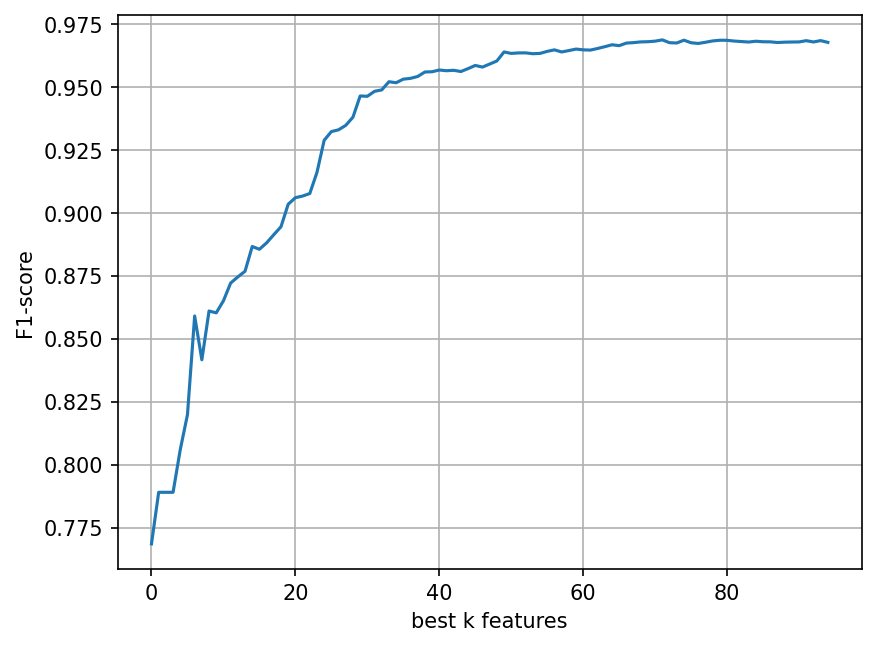

In [229]:
# Finding the best K (optimal # of features for feature selection.
# Use f_classif. This computes the ANOVA F-value for the provided sample.
# use RandomForestClassifier
f1_list = []
for k in range(1,len(df3.columns)):
    bk = fs.SelectKBest(fs.f_classif, k = k)
    bk.fit(X, y)
    x_trans = bk.transform(X)
    #print(type(x_trans))
    #print(x_trans)
    train_x, test_x, train_y, test_y = train_test_split(x_trans,
                                                         y,
                                                         test_size=0.2,
                                                         random_state=42)
    rf = RandomForestClassifier()
    rf.fit(train_x, train_y)
    y_pred = rf.predict(test_x)
    #print(test_y)
    y_pred01 = y_pred == "Neutral or Dissatisfied"
    test_y01 = test_y == "Neutral or Dissatisfied"
    #print(y_pred01)
    y_pred02 = np.array(y_pred01, dtype=int)
    test_y02 = np.array(test_y01,dtype=int)
    # print(test_y,y_pred02)
    f1 = metrics.f1_score(test_y02, y_pred02)
    f1_list.append((f1,k))

fig, axe = plt.subplots(dpi = 150)

# print(type(axe))
f1_list01 = [f1_scr for f1_scr, nf in f1_list]
axe.plot(range(0, len(f1_list01)), f1_list01)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.grid(True)
plt.show()

In [231]:
# Sort f1_list using f1_score as a key for sorting
# The best k would be the value of last element in the list [-1]
# Get the last element by using -1 as index
# display(f1_list)
best_k = sorted(f1_list, key=itemgetter(0))
display(best_k[-1][1])
k = best_k[-1][1]
# excluded = []
# for ndx, col in enumerate(f1_list):
#   if col>=0.9:
#     selected_f1.append(ndx)
#   else:
#     excluded.append(ndx)
# selected_df = df3.iloc[:,selected_f1]
# display(selected_df)

72

In [232]:
# Feature selection, applying Select K Best to output the most important features
# Currently the best k value is 72, which means that the Random Forest would run best on the best 95 variable out of 96
# from sklearn.feature_selection import SelectKBest, f_classif
# y has the column "Satisfaction" as the class column as assigned earlier

X = df3

selector = SelectKBest(f_classif, k = best_k[-1][1])
selector.fit(X, y)
X_new = selector.transform(X)

features = (X.columns[selector.get_support(indices=True)])
features

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'In-flight Service_1', 'In-flight Service_2', 'In-flight Service_3',
       'In-flight Service_4', 'In-flight Service_5', 'Gate Location_1',
       'Gate Location_3', 'Gate Location_5', 'Ease of Online Booking_0',
       'Ease of Online Booking_1', 'Ease of Online Booking_2',
       'Ease of Online Booking_3', 'Ease of Online Booking_4',
       'Ease of Online Booking_5', 'Online Boarding_1', 'Online Boarding_2',
       'Online Boarding_3', 'Online Boarding_4', 'Online Boarding_5',
       'Class_Business', 'Class_Economy', 'Class_Economy Plus',
       'Leg Room Service_1', 'Leg Room Service_2', 'Leg Room Service_3',
       'Leg Room Service_4', 'Leg Room Service_5', 'Cleanliness_1',
       'Cleanliness_2', 'Cleanliness_4', 'Cleanliness_5',
       'Type of Travel_Business', 'Type of Travel_Personal',
       'In-flight Entertainment_1', 'In-flight Entertainment_2',
       'In-flight Entertainment_3', 'In-flight E

In [233]:
# Assign the best 85 selected feature to a new data frame df4
df4 = df3[list(features)]
display(df4)

,Age,Flight Distance,Departure Delay,Arrival Delay,In-flight Service_1,In-flight Service_2,In-flight Service_3,In-flight Service_4,In-flight Service_5,Gate Location_1,...,Food and Drink_5,Check-in Service_1,Check-in Service_2,Check-in Service_5,In-flight Wifi Service_0,In-flight Wifi Service_1,In-flight Wifi Service_2,In-flight Wifi Service_3,In-flight Wifi Service_4,In-flight Wifi Service_5
ID,,,,,,,,,,,,,,,,,,,,,
1,48,821,2,5.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,35,821,26,39.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,41,853,0,0.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,50,1905,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,49,3470,0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,28,447,2,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
129877,41,308,0,0.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
129878,42,337,6,14.0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


**Split the dataset**

**Split the dataset (df4) into Traing set and Test set after removing missing values**

In [234]:
# split the data set into four pieces - X_train. X_test, y_train and y_test.
# randomly sampling without replacement about 80% into training set and 20% into test set.
# spliting dataset is 80% training set and 20% test set is most commmon ratio.
X = df4.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0 , test_size=0.20, shuffle=True)

In [235]:
# view first few rows of train set
X_train.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,In-flight Service_1,In-flight Service_2,In-flight Service_3,In-flight Service_4,In-flight Service_5,Gate Location_1,...,Food and Drink_5,Check-in Service_1,Check-in Service_2,Check-in Service_5,In-flight Wifi Service_0,In-flight Wifi Service_1,In-flight Wifi Service_2,In-flight Wifi Service_3,In-flight Wifi Service_4,In-flight Wifi Service_5
ID,,,,,,,,,,,,,,,,,,,,,
41758,58,230,0,0.0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
121068,25,861,0,0.0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
43321,42,3508,0,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
76604,11,3338,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
61370,58,679,0,0.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [236]:
# count # of missing value in X_train set
X_train["Arrival Delay"].isnull().sum()

0

In [237]:
# view first few rows of test set
y_train.head()

ID
41758     Neutral or Dissatisfied
121068                  Satisfied
43321                   Satisfied
76604                   Satisfied
61370                   Satisfied
Name: Satisfaction, dtype: category
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

In [238]:
# check the size of each set
print(X_train.shape, X_test.shape)

(103589, 72) (25898, 72)


**Handling outliers of train set**

Use IQR (Inter Quartile Range) to finding the outliers and cap the outliers

* capping: to replace the outlier values with a maximum or minimum capped value

**Arrival Delay**

<Axes: ylabel='Arrival Delay'>

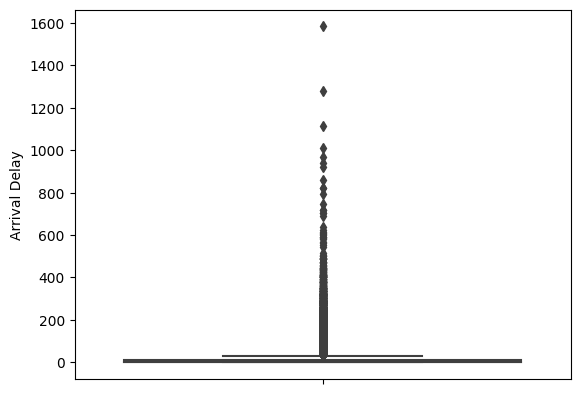

In [239]:
# before capping outliers
sns.boxplot( y="Arrival Delay", data = X_train)

In [240]:
# IQR
Q1 = np.percentile(X_train['Arrival Delay'], 25, method='midpoint')
Q3 = np.percentile(X_train['Arrival Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

13.0


In [241]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

32.5
-19.5


In [242]:
X_train["Arrival Delay"] = np.where(X_train["Arrival Delay"]> upper_bound, upper_bound,
                           np.where(X_train["Arrival Delay"]< lower_bound, lower_bound,
                           X_train["Arrival Delay"]))

<Axes: ylabel='Arrival Delay'>

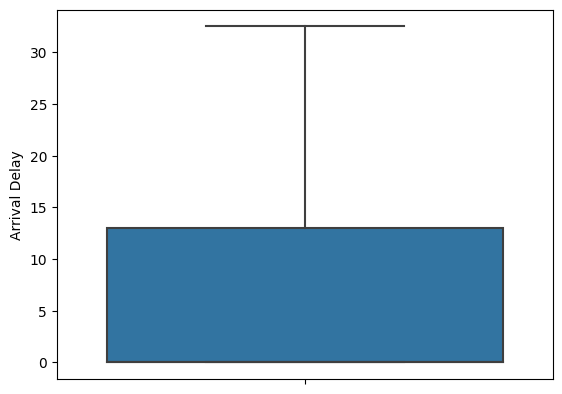

In [243]:
# after capping outliers
sns.boxplot( y="Arrival Delay", data = X_train)

**Flight Distance**

<Axes: ylabel='Flight Distance'>

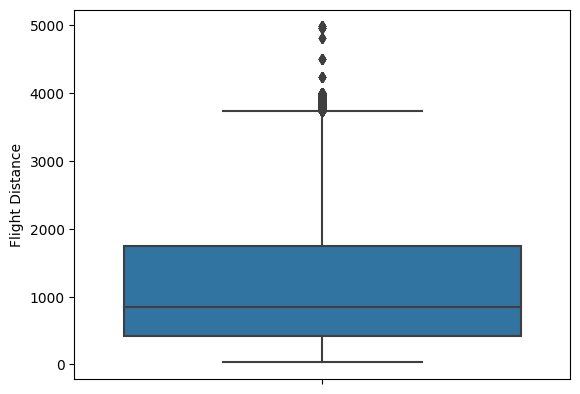

In [244]:
# before capping outliers
sns.boxplot( y="Flight Distance", data = X_train)

In [245]:
# IQR
Q1 = np.percentile(df1['Flight Distance'], 25, method='midpoint')
Q3 = np.percentile(df1['Flight Distance'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1330.0


In [246]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

3739.0
-1581.0


In [247]:
X_train["Flight Distance"] = np.where(X_train["Flight Distance"]> upper_bound, upper_bound,
                             np.where(X_train["Flight Distance"]< lower_bound, lower_bound,
                             X_train["Flight Distance"]))

<Axes: ylabel='Flight Distance'>

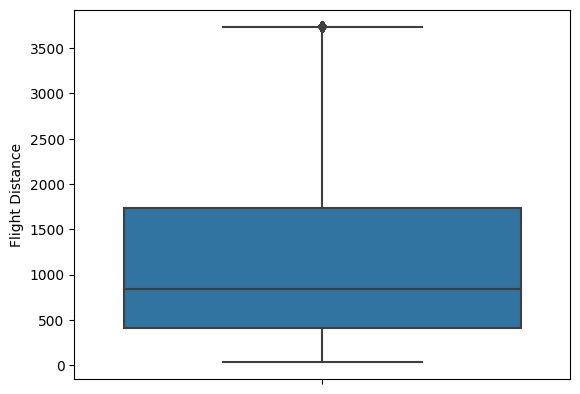

In [248]:
# after capping outliers
sns.boxplot( y="Flight Distance", data = X_train)

**Departure Delay**

<Axes: ylabel='Departure Delay'>

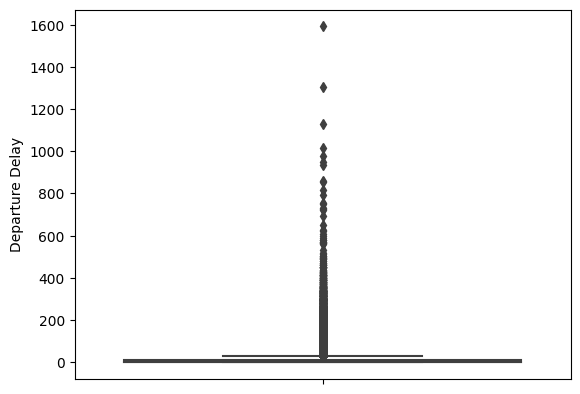

In [249]:
# before capping outliers
sns.boxplot( y="Departure Delay", data = X_train)

In [250]:
# IQR
Q1 = np.percentile(df1['Departure Delay'], 25, method='midpoint')
Q3 = np.percentile(df1['Departure Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

12.0


In [251]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

30.0
-18.0


In [252]:
X_train["Departure Delay"] = np.where(X_train["Departure Delay"]> upper_bound, upper_bound,
                             np.where(X_train["Departure Delay"]< lower_bound, lower_bound,
                             X_train["Departure Delay"]))

<Axes: ylabel='Departure Delay'>

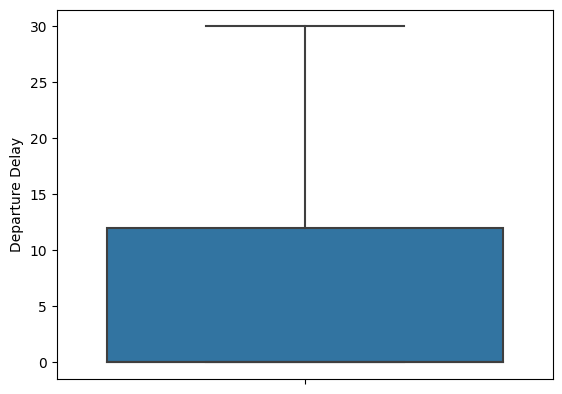

In [253]:
# after capping outliers
sns.boxplot( y="Departure Delay", data = X_train)

**Scaling**

In [254]:
# encoded_X_train.info()
num_cols

['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

In [255]:
display(X_train[num_cols])

,Age,Flight Distance,Departure Delay,Arrival Delay
ID,,,,
41758,58,230.0,0.0,0.0
121068,25,861.0,0.0,0.0
43321,42,3508.0,0.0,0.0
76604,11,3338.0,0.0,0.0
61370,58,679.0,0.0,0.0
...,...,...,...,...
46070,26,3344.0,0.0,0.0
118313,23,639.0,2.0,2.0
42779,23,744.0,30.0,32.5


In [256]:
# Pre-processing and scaling dataset for numerical variables
scaler = preprocessing.MinMaxScaler()
# scaler.fit(encoded_X_train[num_cols])
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [257]:
display(X_train)

,Age,Flight Distance,Departure Delay,Arrival Delay,In-flight Service_1,In-flight Service_2,In-flight Service_3,In-flight Service_4,In-flight Service_5,Gate Location_1,...,Food and Drink_5,Check-in Service_1,Check-in Service_2,Check-in Service_5,In-flight Wifi Service_0,In-flight Wifi Service_1,In-flight Wifi Service_2,In-flight Wifi Service_3,In-flight Wifi Service_4,In-flight Wifi Service_5
ID,,,,,,,,,,,,,,,,,,,,,
41758,0.653846,0.053668,0.000000,0.000000,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
121068,0.230769,0.223840,0.000000,0.000000,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
43321,0.448718,0.937702,0.000000,0.000000,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
76604,0.051282,0.891855,0.000000,0.000000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
61370,0.653846,0.174757,0.000000,0.000000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46070,0.243590,0.893474,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
118313,0.205128,0.163970,0.066667,0.061538,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
42779,0.205128,0.192287,1.000000,1.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**(Absulete, please review the cells above) Keep only selected 14 features in test set for build model in following process**

In [ ]:
# selected_X_test = encoded_X_test[['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service',
#                                   'Online Boarding', 'On-board Service', 'Seat Comfort',
#                                   'Leg Room Service', 'Cleanliness', 'Food and Drink',
#                                   'In-flight Service', 'In-flight Wifi Service',
#                                   'In-flight Entertainment', 'Baggage Handling']].copy()

In [ ]:
# selected_X_test.info()

In [ ]:
print(type(selected_X_test))

<class 'pandas.core.frame.DataFrame'>


**Applying undersampling, oversampling and SMOTE to address the imbalance in the target class, "Satisfaction".**

**Applying SMOTE**

In [258]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# define dataset
X_SMOTE = X_train.copy()
y_SMOTE = y_train.copy()
# summarize class distribution
counter = Counter(y_SMOTE)
print('Before SMOTE',(counter))
# transform the dataset
smotesample = SMOTE()
X_SMOTE, y_SMOTE = smotesample.fit_resample(X_SMOTE, y_SMOTE)
# summarize the new class distribution
counter = Counter(y_SMOTE)
print('After SMOTE',(counter))

Before SMOTE Counter({'Neutral or Dissatisfied': 58687, 'Satisfied': 44902})
After SMOTE Counter({'Neutral or Dissatisfied': 58687, 'Satisfied': 58687})


In [259]:
SMOTE_X_train = X_SMOTE.copy()

In [260]:
SMOTE_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117374 entries, 0 to 117373
Data columns (total 72 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age                                       117374 non-null  float64
 1   Flight Distance                           117374 non-null  float64
 2   Departure Delay                           117374 non-null  float64
 3   Arrival Delay                             117374 non-null  float64
 4   In-flight Service_1                       117374 non-null  uint8  
 5   In-flight Service_2                       117374 non-null  uint8  
 6   In-flight Service_3                       117374 non-null  uint8  
 7   In-flight Service_4                       117374 non-null  uint8  
 8   In-flight Service_5                       117374 non-null  uint8  
 9   Gate Location_1                           117374 non-null  uint8  
 10  Gate Location_3     

In [ ]:
# SMOTE_X_train = pd.DataFrame(X_SMOTE)
# SMOTE_X_train.columns = features.columns

In [261]:
SMOTE_y_train = y_SMOTE.copy()
SMOTE_y_train.value_counts()

Neutral or Dissatisfied    58687
Satisfied                  58687
Name: Satisfaction, dtype: int64

**Applying undersampling**

In [262]:
# from imblearn.under_sampling import RandomUnderSampler
# define dataset
X_under = X_train
y_under = y_train
# summarize class distribution
print('Before UnderSampling',(Counter(y_under)))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_under, y_under)
# summarize class distribution
print('After UnderSampling',(Counter(y_under)))

Before UnderSampling Counter({'Neutral or Dissatisfied': 58687, 'Satisfied': 44902})
After UnderSampling Counter({'Neutral or Dissatisfied': 44902, 'Satisfied': 44902})


In [263]:
undersampling_X_train = X_under.copy()
undersampling_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89804 entries, 0 to 89803
Data columns (total 72 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       89804 non-null  float64
 1   Flight Distance                           89804 non-null  float64
 2   Departure Delay                           89804 non-null  float64
 3   Arrival Delay                             89804 non-null  float64
 4   In-flight Service_1                       89804 non-null  uint8  
 5   In-flight Service_2                       89804 non-null  uint8  
 6   In-flight Service_3                       89804 non-null  uint8  
 7   In-flight Service_4                       89804 non-null  uint8  
 8   In-flight Service_5                       89804 non-null  uint8  
 9   Gate Location_1                           89804 non-null  uint8  
 10  Gate Location_3                   

In [ ]:
# undersampling_X_train = pd.DataFrame(X_under)
# undersampling_X_train.columns = features.columns

In [ ]:
# undersampling_X_train.info()

In [264]:
undersampling_y_train = y_under.copy()
undersampling_y_train.value_counts()

Neutral or Dissatisfied    44902
Satisfied                  44902
Name: Satisfaction, dtype: int64

**Applying oversampling**

In [265]:
# from imblearn.over_sampling import RandomOverSampler
# define dataset
X_over = X_train
# y_over = y_train
y_over = y_train
# summarize class distribution
print('Before OverSampling',(Counter(y_over)))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_over, y_over)
# summarize class distribution
print('After OverSampling',(Counter(y_over)))

Before OverSampling Counter({'Neutral or Dissatisfied': 58687, 'Satisfied': 44902})
After OverSampling Counter({'Neutral or Dissatisfied': 58687, 'Satisfied': 58687})


In [266]:
oversampling_X_train = X_over.copy()
oversampling_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117374 entries, 0 to 117373
Data columns (total 72 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Age                                       117374 non-null  float64
 1   Flight Distance                           117374 non-null  float64
 2   Departure Delay                           117374 non-null  float64
 3   Arrival Delay                             117374 non-null  float64
 4   In-flight Service_1                       117374 non-null  uint8  
 5   In-flight Service_2                       117374 non-null  uint8  
 6   In-flight Service_3                       117374 non-null  uint8  
 7   In-flight Service_4                       117374 non-null  uint8  
 8   In-flight Service_5                       117374 non-null  uint8  
 9   Gate Location_1                           117374 non-null  uint8  
 10  Gate Location_3     

In [ ]:
# oversampling_X_train = pd.DataFrame(X_over)
# oversampling_X_train.columns = features.columns

In [ ]:
# oversampling_X_train.info()

In [267]:
oversampling_y_train = y_over.copy()
oversampling_y_train.value_counts()

Neutral or Dissatisfied    58687
Satisfied                  58687
Name: Satisfaction, dtype: int64

# **Building Model**

**Apply Random Forest, k-Nearest Neighbours, and Gradient Boosting (Extreme Gradient Boosting (XGBoost))**

**Random Forest: SMOTE**

In [268]:
RF = RandomForestClassifier(max_features= 14,  max_depth=7) # set parameter randomly

In [269]:
RF.fit(SMOTE_X_train, SMOTE_y_train)
RF.score(SMOTE_X_train, SMOTE_y_train)

0.9352241552643686

**Random Forest: undersampling**

In [270]:
RF.fit(undersampling_X_train, undersampling_y_train)
RF.score(undersampling_X_train, undersampling_y_train)

0.935136519531424

**Random Forest: oversampling**

In [271]:
RF.fit(oversampling_X_train, oversampling_y_train)
RF.score(oversampling_X_train, oversampling_y_train)

0.9337672738425886

**Comparing the scores**

In [272]:
score_RF = [["SMOTE", 0.935], ["undersampling", 0.935], ["oversampling", 0.933]]

# define header name
cols_names = ["Method - RF", "Score"]

# display table
print(tabulate(score_RF, headers=cols_names, tablefmt="fancy_grid"))

╒═══════════════╤═════════╕
│ Method - RF   │   Score │
╞═══════════════╪═════════╡
│ SMOTE         │   0.935 │
├───────────────┼─────────┤
│ undersampling │   0.935 │
├───────────────┼─────────┤
│ oversampling  │   0.933 │
╘═══════════════╧═════════╛


**Observations**: Got all the same socre.  

**Checking the important features using Random Forest: SMOTE**

In [ ]:
# RF_SMOTE_X_train = SMOTE_X_train.copy()
# RF_SMOTE_y_train = SMOTE_y_train.copy()

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.title('feature importances for Random Forest: SMOTE')
#     plt.show()

# features_names = RF_SMOTE_X_train.columns

# rf = RandomForestClassifier(n_estimators=14 , max_depth=7 , min_samples_split=25 , max_features=4, random_state=0)
# rf.fit(RF_SMOTE_X_train , RF_SMOTE_y_train)
# f_importances(abs(rf.feature_importances_), features_names, top=7)

In [273]:
# fit the model using the training data
# RF = RandomForestClassifier(max_features= 14,  max_depth=7)
RF = RandomForestClassifier(max_features= best_k[-1][1],  max_depth=7)
RF.fit(SMOTE_X_train , SMOTE_y_train)

# use model to make predictions on test data
y_pred_RF = (RF.predict(X_test))
y_pred_RF

array(['Satisfied', 'Neutral or Dissatisfied', 'Satisfied', ...,
       'Satisfied', 'Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [274]:
# Printing actuals and predictions
# print('Actuals:\t\t', list(encoded_y_test))
print('Actuals:\t\t', list(y_test))
print('Predictions with RF model:\t', list(y_pred_RF))

Actuals:		 ['Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'S

In [275]:
# confution matrix of RF
# cnf_matrix_RF = metrics.confusion_matrix(encoded_y_test, y_pred_RF)
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix_RF

array([[13460,  1078],
       [  944, 10416]])

In [276]:
# classification report - RF
# print(classification_report(encoded_y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.93      0.93     14538
              Satisfied       0.91      0.92      0.91     11360

               accuracy                           0.92     25898
              macro avg       0.92      0.92      0.92     25898
           weighted avg       0.92      0.92      0.92     25898



**KNN: SMOTE**

In [277]:
KNN = KNeighborsClassifier(n_neighbors=5) # 5 is default

In [278]:
KNN.fit(SMOTE_X_train, SMOTE_y_train)
KNN.score(SMOTE_X_train, SMOTE_y_train)

0.965920902414504

**KNN: undersampling**

In [279]:
KNN.fit(undersampling_X_train, undersampling_y_train)
KNN.score(undersampling_X_train, undersampling_y_train)

0.9586878090062804

**KNN: oversampling**

In [280]:
KNN.fit(oversampling_X_train, oversampling_y_train)
KNN.score(oversampling_X_train, oversampling_y_train)

0.9620273655153612

**Comparing the scores**

In [281]:
score_KNN = [["SMOTE", 0.965], ["undersampling", 0.958], ["oversampling", 0.962]]

# define header name
cols_names = ["Method - KNN", "Score"]

# display table
print(tabulate(score_KNN, headers=cols_names, tablefmt="fancy_grid"))

╒════════════════╤═════════╕
│ Method - KNN   │   Score │
╞════════════════╪═════════╡
│ SMOTE          │   0.965 │
├────────────────┼─────────┤
│ undersampling  │   0.958 │
├────────────────┼─────────┤
│ oversampling   │   0.962 │
╘════════════════╧═════════╛


**Observations:** KNN: There is no significant difference.

In [282]:
# fit the model using the training data
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(SMOTE_X_train , SMOTE_y_train)

# use model to make predictions on test data
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array(['Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Neutral or Dissatisfied', ..., 'Satisfied',
       'Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [283]:
# Printing actuals and predictions
# print('Actuals:\t\t', list(encoded_y_test))
print('Actuals:\t\t', list(y_test))
print('Predictions with RF model:\t', list(y_pred_KNN))

Actuals:		 ['Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'S

In [284]:
# confution matrix of KNN
# cnf_matrix_RF = metrics.confusion_matrix(encoded_y_test, y_pred_RF)
cnf_matrix_KNN = metrics.confusion_matrix(y_test, y_pred_KNN)
cnf_matrix_KNN

array([[13454,  1084],
       [ 8383,  2977]])

In [285]:
# classification report - RF
# print(classification_report(encoded_y_test, y_pred_RF))
print(classification_report(y_test, y_pred_KNN))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.62      0.93      0.74     14538
              Satisfied       0.73      0.26      0.39     11360

               accuracy                           0.63     25898
              macro avg       0.67      0.59      0.56     25898
           weighted avg       0.67      0.63      0.58     25898



**XGBoost: SMOTE**

In [287]:
XGB = GradientBoostingClassifier(max_depth=3) # 3 is default

In [288]:
XGB.fit(SMOTE_X_train, SMOTE_y_train)
XGB.score(SMOTE_X_train, SMOTE_y_train)

0.9428152742515378

**XGBoost: undersampling**

In [289]:
XGB.fit(undersampling_X_train, undersampling_y_train)
XGB.score(undersampling_X_train, undersampling_y_train)

0.9436105295977908

**XGBoost: oversampling**

In [290]:
XGB.fit(oversampling_X_train, oversampling_y_train)
XGB.score(oversampling_X_train, oversampling_y_train)

0.9436587319167788

**Comparing the scores**

In [291]:
score_XGBoost = [["SMOTE", 0.942], ["undersampling", 0.943], ["oversampling", 0.943]]

# define header name
cols_names = ["Method - XGBoost", "Score"]

# display table
print(tabulate(score_XGBoost, headers=cols_names, tablefmt="fancy_grid"))

╒════════════════════╤═════════╕
│ Method - XGBoost   │   Score │
╞════════════════════╪═════════╡
│ SMOTE              │   0.942 │
├────────────────────┼─────────┤
│ undersampling      │   0.943 │
├────────────────────┼─────────┤
│ oversampling       │   0.943 │
╘════════════════════╧═════════╛


**Observations:** XGBoost: there is no significant difference.

In [321]:
# convert y class to nemarical class, 0 and 1. 0 is 'Neutral or Dissatisfied' and 1 is 'Satisfied'.
y0y = y != 'Neutral or Dissatisfied'

In [322]:
y0y

ID
1         False
2          True
3          True
4          True
5          True
          ...  
129876    False
129877    False
129878    False
129879     True
129880    False
Name: Satisfaction, Length: 129487, dtype: bool

In [323]:
type(y0y)

pandas.core.series.Series

In [324]:
y0y.values

array([False,  True,  True, ..., False,  True, False])

In [325]:
y0y = y0y.replace({True:1, False:0})
display(y0y)

ID
1         0
2         1
3         1
4         1
5         1
         ..
129876    0
129877    0
129878    0
129879    1
129880    0
Name: Satisfaction, Length: 129487, dtype: int64

In [326]:
y0y = SMOTE_y_train !='Neutral or Dissatisfied'
y0y = y0y.replace({True:1, False:0})
display(y0y)

0         0
1         1
2         1
3         1
4         1
         ..
117369    1
117370    1
117371    1
117372    1
117373    1
Name: Satisfaction, Length: 117374, dtype: int64

In [327]:
XGB_SMOTE_y_train = y0y

In [328]:
y0y_test = y_test !='Neutral or Dissatisfied'
y0y_test = y0y_test.replace({True:1, False:0})
display(y0y_test)

ID
43209     1
125239    0
28497     0
124204    1
39419     1
         ..
104897    1
122462    1
34291     1
105846    0
123640    1
Name: Satisfaction, Length: 25898, dtype: int64

In [329]:
XGB_y_test = y0y_test
display(XGB_y_test)

ID
43209     1
125239    0
28497     0
124204    1
39419     1
         ..
104897    1
122462    1
34291     1
105846    0
123640    1
Name: Satisfaction, Length: 25898, dtype: int64

In [330]:
# fit the model using the training data
XGB = XGBClassifier(max_depth = 6)
XGB.fit(SMOTE_X_train, XGB_SMOTE_y_train)

# use model to make predictions on test data
y_pred_XGB = XGB.predict(X_test)
y_pred_XGB

array([1, 0, 0, ..., 1, 0, 1])

In [331]:
# Printing actuals and predictions
# print('Actuals:\t\t', list(encoded_y_test))
print('Actuals:\t\t', list(y_test))
print('Predictions with RF model:\t', list(y_pred_XGB))

Actuals:		 ['Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied', 'S

In [332]:
# confution matrix of KNN
# cnf_matrix_RF = metrics.confusion_matrix(encoded_y_test, y_pred_RF)
cnf_matrix_XGB = metrics.confusion_matrix(XGB_y_test, y_pred_XGB)
cnf_matrix_XGB

array([[14359,   179],
       [ 1183, 10177]])

In [333]:
# classification report - RF
# print(classification_report(encoded_y_test, y_pred_RF))
print(classification_report(XGB_y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     14538
           1       0.98      0.90      0.94     11360

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.95     25898
weighted avg       0.95      0.95      0.95     25898



**Based on score, this project selected SMOTE dataset and find the optimal parameters for given models**

In [314]:
# Model activation and result plot function

def get_model_metrics(model, SMOTE_X_train, X_test, SMOTE_y_train, y_test):

    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.

    Inputs:
        model, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test
    Output:
        Model output metrics, confusion matrix, ROC AUC curve
    '''

    # Mark of current time when model began running
    t0 = time.time()

    # Fit the model on the training data and run predictions on test data
    model.fit(SMOTE_X_train,  SMOTE_y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    ConfusionMatrix = confusion_matrix(y_test, y_pred, labels = model.classes_)
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(SMOTE_X_train,  SMOTE_y_train)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(y_test, y_pred)
    # Obtain f1 from predictions using Sklearn's metrics package
    f1 = f1_score(y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(y_test, y_pred_proba)
    # Obtain the time taken used to run the model, by subtracting the start time from the current time
    time_taken = time.time() - t0
    # Obtain the resources consumed in running the model
    memory_used = int(getrusage(RUSAGE_SELF).ru_maxrss / 1024)

    # Outputting the metrics of the model performance
    print("Accuracy on Training = {}".format(train_score))
    print("Accuracy on Test = {} • Precision = {}".format(accuracy, precision))
    print("Recall = {} • ROC Area under Curve = {}".format(recall, roc))
    print("F1 = {} • ROC Area under Curve = {}".format(f1, roc))
    print("Time taken = {} seconds • Memory consumed = {} Bytes".format(time_taken, memory_used))

    # Plotting the confusion matrix of the model's predictive capabilities
    dis = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels= model.classes_)
    # dis = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels= ['Dissatisfied', 'Satisfied'])
    # Plotting the ROC AUC curve of the model
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    # create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    dis.plot(values_format='')
    plt.show()


    return model, train_score, accuracy, precision, recall, f1, roc, time_taken, memory_used

**Parameters for Random Forest**

In [307]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Performing GridSearchCV to obtain optimal model parameters**

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score

In [308]:
%%time
clf = RandomForestClassifier()

params = { 'max_depth': [5, 10, 15, 20],
           'max_leaf_nodes': [10, 20, 30, 40],
           'min_samples_split': [1, 2, 3, 4]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_split': 2}
CPU times: user 22.6 s, sys: 2.66 s, total: 25.3 s
Wall time: 21min 32s


In [334]:
SMOTE_y_train

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
117369                  Satisfied
117370                  Satisfied
117371                  Satisfied
117372                  Satisfied
117373                  Satisfied
Name: Satisfaction, Length: 117374, dtype: category
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

In [337]:
SMOTE_y_train = y0y.copy()
display(SMOTE_y_train)

0         0
1         1
2         1
3         1
4         1
         ..
117369    1
117370    1
117371    1
117372    1
117373    1
Name: Satisfaction, Length: 117374, dtype: int64

In [338]:
y_test = y0y_test.copy()

In [339]:
y0y_test

ID
43209     1
125239    0
28497     0
124204    1
39419     1
         ..
104897    1
122462    1
34291     1
105846    0
123640    1
Name: Satisfaction, Length: 25898, dtype: int64

**Running model pipeline and obtaining performance metrics - Random Forest**

Accuracy on Training = 0.9334946410619047
Accuracy on Test = 0.9314618889489535 • Precision = 0.9252062816076657
Recall = 0.9179577464788733 • ROC Area under Curve = 0.9798255700456695
F1 = 0.9215677610357474 • ROC Area under Curve = 0.9798255700456695
Time taken = 11.879323720932007 seconds • Memory consumed = 2569 Bytes


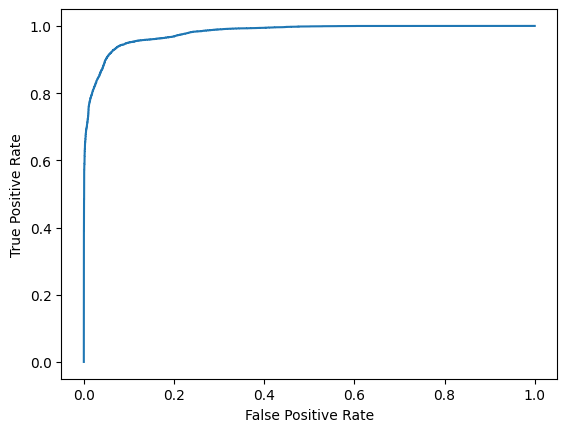

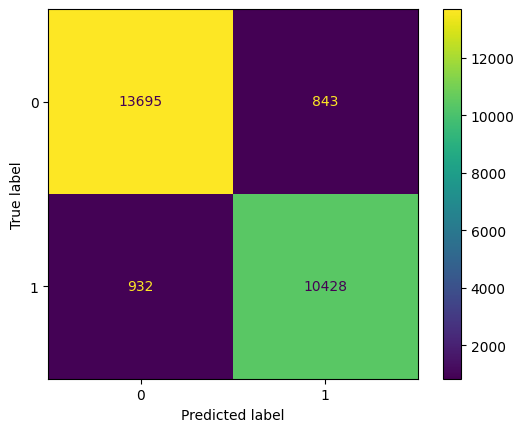

In [340]:
model_rf = RandomForestClassifier(**params)
model_rf, train_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf, tt_rf, mu_rf = get_model_metrics(model_rf, SMOTE_X_train, X_test, SMOTE_y_train, y_test)

In [335]:
SMOTE_y_train

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
117369                  Satisfied
117370                  Satisfied
117371                  Satisfied
117372                  Satisfied
117373                  Satisfied
Name: Satisfaction, Length: 117374, dtype: category
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

In [320]:
 y_test

ID
43209                   Satisfied
125239    Neutral or Dissatisfied
28497     Neutral or Dissatisfied
124204                  Satisfied
39419                   Satisfied
                   ...           
104897                  Satisfied
122462                  Satisfied
34291                   Satisfied
105846    Neutral or Dissatisfied
123640                  Satisfied
Name: Satisfaction, Length: 25898, dtype: category
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

**Parameters for KNN**

In [341]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Performing GridSearchCV to obtain optimal model parameters**

In [343]:
%%time
clf = KNeighborsClassifier()

params = { 'n_neighbors': [5, 10, 15, 25]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'n_neighbors': 5}
CPU times: user 45.6 s, sys: 922 ms, total: 46.5 s
Wall time: 6min 50s


**Running model pipeline and obtaining performance metrics - KNN**

Accuracy on Training = 0.9307257143830832
Accuracy on Test = 0.9282183952428759 • Precision = 0.9245687729019573
Recall = 0.9106514084507042 • ROC Area under Curve = 0.9805256234753409
F1 = 0.9175573196150606 • ROC Area under Curve = 0.9805256234753409
Time taken = 12.043384075164795 seconds • Memory consumed = 2569 Bytes


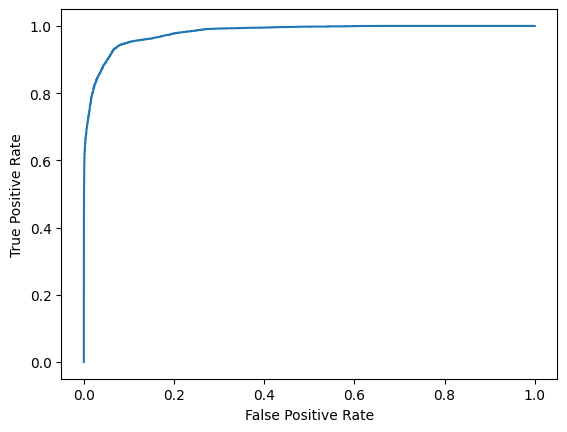

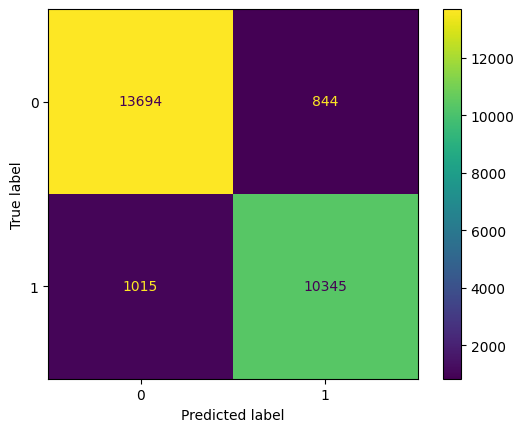

In [344]:
model_KNN = KNeighborsClassifier(**params)
model_KNN, train_KNN, accuracy_KNN, precision_KNN, recall_KNN, f1_KNN, roc_KNN, tt_KNN, mu_KNN = get_model_metrics(model_rf, SMOTE_X_train, X_test, SMOTE_y_train, y_test)

**Parameters for XGBoost**

In [345]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

**Performing GridSearchCV to obtain optimal model parameters**

In [346]:
%%time
clf = XGBClassifier()


params = { 'max_depth': [3, 5, 6],
           'learning_rate': [0.01, 0.1],
           'n_estimators': [100, 500]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
CPU times: user 7min 25s, sys: 12.4 s, total: 7min 38s
Wall time: 1h 25min 24s


**Running model pipeline and obtaining performance metrics - XGBoost**

Accuracy on Training = 0.930768313255065
Accuracy on Test = 0.9278708780600818 • Precision = 0.9254212979562567
Recall = 0.9088028169014084 • ROC Area under Curve = 0.9797234154687375
F1 = 0.9170367738497069 • ROC Area under Curve = 0.9797234154687375
Time taken = 13.496250629425049 seconds • Memory consumed = 2569 Bytes


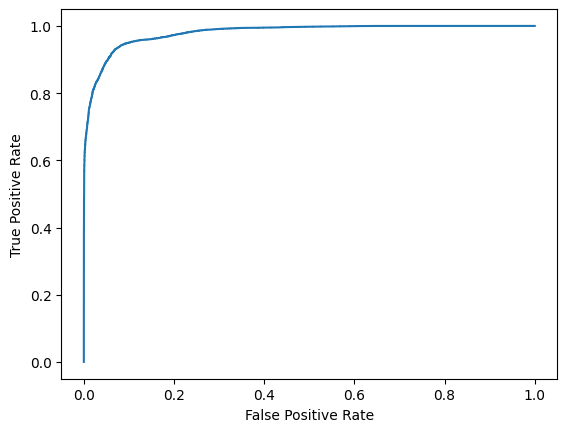

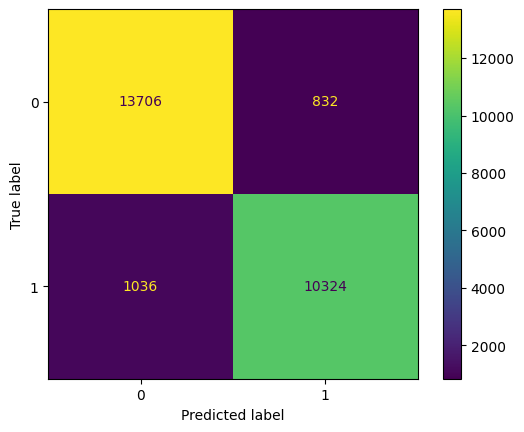

In [347]:
model_XGB = XGBClassifier(**params)
model_XGB, train_XGB, accuracy_XGB, precision_XGB, recall_XGB, f1_XGB, roc_XGB, tt_XGB, mu_XGB = get_model_metrics(model_rf, SMOTE_X_train, X_test, SMOTE_y_train, y_test)

**Comparing output performance of the model pipelines**

In [348]:
# Collecting model data
training_scores = [train_rf, train_KNN, train_XGB]
accuracy = [accuracy_rf, accuracy_KNN, accuracy_XGB]
precision = [precision_rf, precision_KNN, precision_XGB]
recall = [recall_rf, recall_KNN, recall_XGB]
f1_scores = [f1_rf, f1_KNN, f1_XGB]
roc_scores = [roc_rf, roc_KNN, roc_XGB]
time_scores = [tt_rf, tt_KNN, tt_XGB]
memory_scores = [mu_rf, mu_KNN, mu_XGB]

model_data = {'Model': ['Random Forest', 'KNN', 'XGBoost'],
            'Accuracy on Training' : training_scores,
            'Accuracy on Test' : accuracy,
            'Precision' : precision,
            'Recall' : recall,
            'F1' : f1_scores,
            'ROC AUC Score' : roc_scores,
            'Time Elapsed (seconds)' : time_scores,
            'Memory Consumed (bytes)': memory_scores}

model_data = pd.DataFrame(model_data)
model_data

,Model,Accuracy on Training,Accuracy on Test,Precision,Recall,F1,ROC AUC Score,Time Elapsed (seconds),Memory Consumed (bytes)
0,Random Forest,0.933495,0.931462,0.925206,0.917958,0.921568,0.979826,11.879324,2569
1,KNN,0.930726,0.928218,0.924569,0.910651,0.917557,0.980526,12.043384,2569
2,XGBoost,0.930768,0.927871,0.925421,0.908803,0.917037,0.979723,13.496251,2569


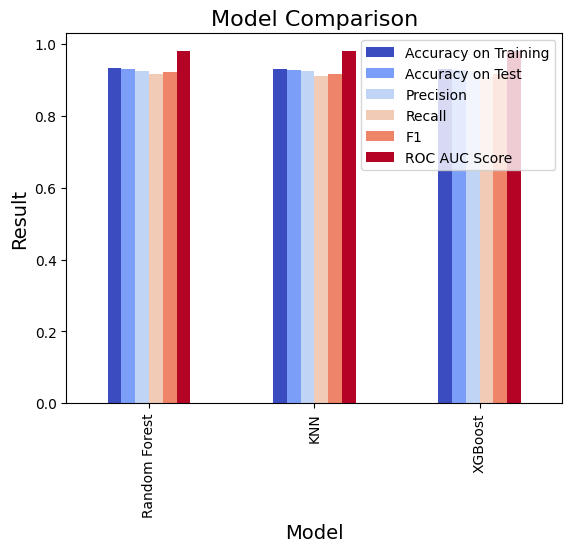

In [349]:
# Plotting each model's performance scores vs time elapsed
# plt.rcParams["figure.figsize"] = (15,10)

ax1 = model_data.plot.bar(x = 'Model', y = ["Accuracy on Training", "Accuracy on Test", "Precision", "Recall",
                                           "F1", "ROC AUC Score"],
                          cmap = 'coolwarm')
ax1.legend()

ax1.set_title("Model Comparison", fontsize = 16)
ax1.set_xlabel('Model', fontsize = 14)
ax1.set_ylabel('Result', fontsize = 14, color = 'Black');

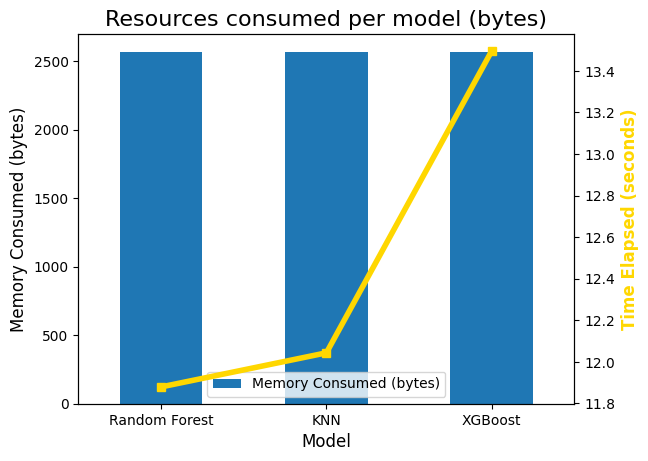

In [350]:
# Plotting each model's memory consumption
ax1 = model_data.plot.bar(x = 'Model', y = 'Memory Consumed (bytes)')

ax1.set_title("Resources consumed per model (bytes)", fontsize = 16)
ax2 = model_data['Time Elapsed (seconds)'].plot(secondary_y = True, color = 'Gold', linewidth = 4, marker = 's')
ax1.set_xlabel('Model', fontsize = 12)
ax2.set_ylabel('Time Elapsed (seconds)', fontsize = 12, color = 'Gold', fontweight = 'bold')
ax1.set_ylabel('Memory Consumed (bytes)', fontsize = 12, color = 'Black');

**Feature importance of finalist pipeline - Random Forest**

**Check top 15 features**

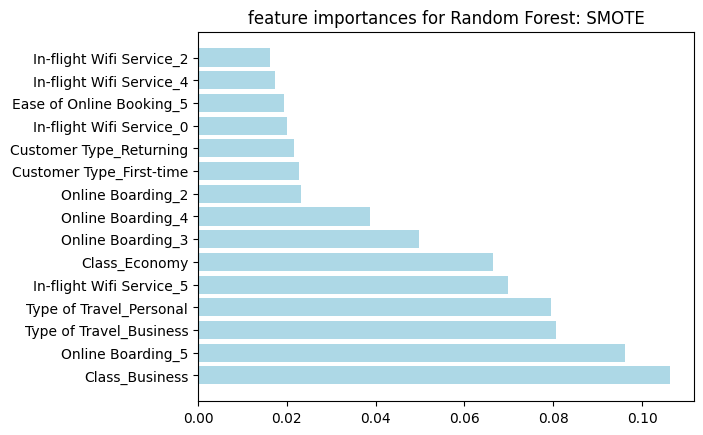

In [352]:
RF_SMOTE_X_train = SMOTE_X_train.copy()
RF_SMOTE_y_train = SMOTE_y_train.copy()

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Random Forest: SMOTE')
    plt.show()

features_names = RF_SMOTE_X_train.columns

rf = RandomForestClassifier(max_depth=10 , max_leaf_nodes=40, min_samples_split=2, random_state=0)
rf.fit(RF_SMOTE_X_train , RF_SMOTE_y_train)
f_importances(abs(rf.feature_importances_), features_names, top=15)

**Observations:** The top feature is Class_Business and Online Boarding and Type of Travel are follow.